# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [106]:
import numpy as np
import xgi
import networkx as nx
import copy
from scipy.stats import kendalltau as KT

from hyperfunctions import *

In [107]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [108]:
n = 10
samples = 10

## Erdös-Renyi

In [109]:
G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

In [110]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

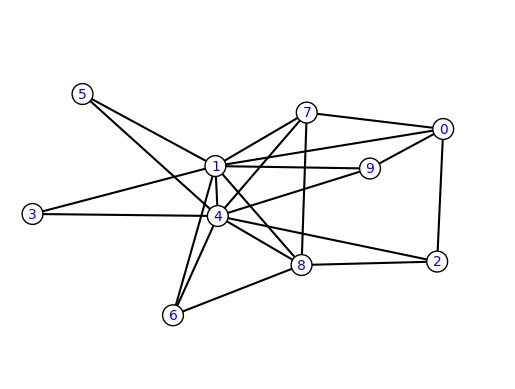

In [111]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
xgi.draw(H, node_labels=True, font_color_nodes="blue")

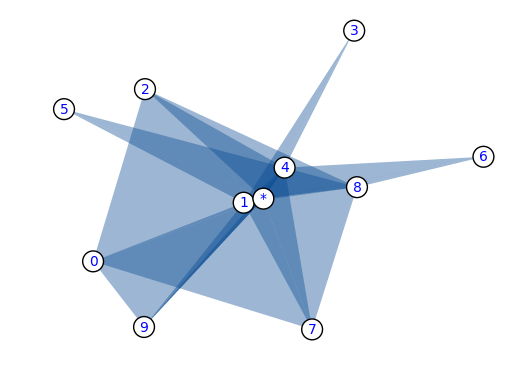

In [112]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [113]:
HEC = list(xgi.HEC_centrality(H3).values())[:-1]

In [114]:
KT(EIG, HEC).statistic

0.1797866299901979

In [126]:
EIG /= np.sum(EIG)
EIG

array([0.15004204, 0.16810831, 0.07931892, 0.08163995, 0.08721224,
       0.13107412, 0.10233467, 0.06846167, 0.05767351, 0.07413457])

In [127]:
HEC /= np.sum(HEC)
HEC

array([0.12594239, 0.13383621, 0.09510704, 0.09559653, 0.08835789,
       0.11488675, 0.0999702 , 0.08303694, 0.08382467, 0.0794414 ])

## Scale-free

In [115]:
G = nx.barabasi_albert_graph(n, 2)

In [116]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

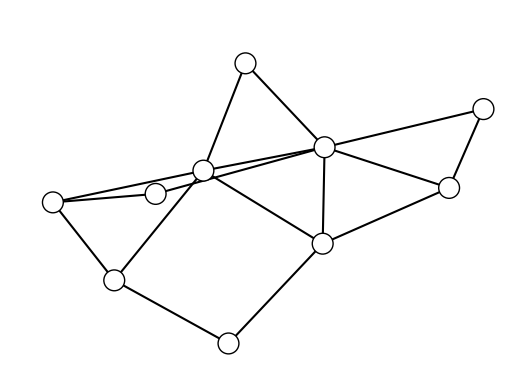

In [117]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
xgi.draw(H, with_labels=True)

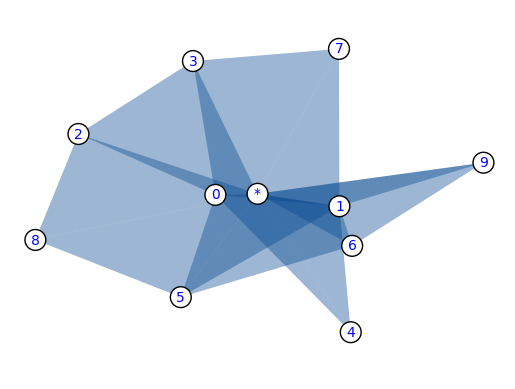

In [118]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [119]:
HEC = list(xgi.HEC_centrality(H3).values())[:-1]

In [120]:
KT(EIG, HEC).statistic

0.7777777777777777